In [5]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import Model

In [7]:
path='../input/time-image-datasetclassification'
dirs = os.listdir(path)

In [8]:
classes=os.listdir(f'{path}/train')

In [9]:
np.array(Image.open(path+'/train/1-00/20.jpg')).shape

(224, 224, 3)

# All Images have the shape (224,224,3)
## -------------------------------------

## Creating Image Data generator

In [10]:

train_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(
rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


## Specifying  Directories

In [11]:
train_generator = train_datagen.flow_from_directory(
        f'{path}/train',
        target_size=(64, 64),
        batch_size=32,
    color_mode = 'grayscale',
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
         f'{path}/test',
        target_size=(64, 64),
        batch_size=32,
    color_mode = 'grayscale',
        class_mode='categorical')

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


## Displaying First 4 images in train set

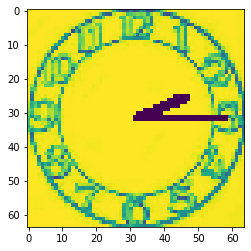

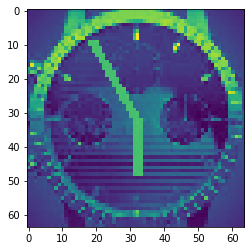

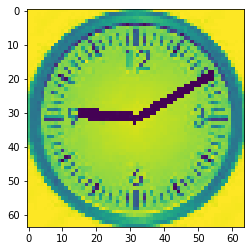

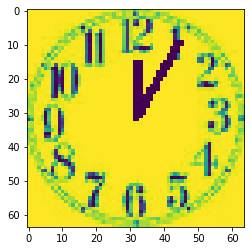

In [12]:
x_batch, y_batch = next(train_generator)
for i in range(0,4):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

## Defining the CNN Model Architecture

In [13]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),input_shape=(64,64,1),activation="relu"),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.Conv2D(256,(3,3),activation="relu"),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(144,activation="softmax")
])

2023-01-03 08:28:20.805140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 08:28:20.917192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 08:28:20.918539: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-03 08:28:20.920641: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [15]:
model.compile(metrics=['accuracy'],optimizer="adam",loss="categorical_crossentropy")

### Training Model on 50 Epochs

In [16]:
model.fit(train_generator,validation_data=validation_generator,epochs=50)

2023-01-03 08:28:37.105037: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-03 08:28:38.524078: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


360/360 [==============================] - 57s 140ms/step - loss: 5.2347 - accuracy: 0.0432 - val_loss: 24.0423 - val_accuracy: 0.0139
Epoch 2/50
360/360 [==============================] - 26s 72ms/step - loss: 2.6267 - accuracy: 0.4187 - val_loss: 1.6247 - val_accuracy: 0.6000
Epoch 3/50
360/360 [==============================] - 25s 70ms/step - loss: 1.1586 - accuracy: 0.7364 - val_loss: 0.9172 - val_accuracy: 0.7979
Epoch 4/50
360/360 [==============================] - 24s 67ms/step - loss: 0.8043 - accuracy: 0.8271 - val_loss: 0.8770 - val_accuracy: 0.8174
Epoch 5/50
360/360 [==============================] - 28s 77ms/step - loss: 0.6861 - accuracy: 0.8461 - val_loss: 0.6302 - val_accuracy: 0.8562
Epoch 6/50
360/360 [==============================] - 26s 73ms/step - loss: 0.5624 - accuracy: 0.8659 - val_loss: 0.5244 - val_accuracy: 0.8743
Epoch 7/50
360/360 [==============================] - 24s 66ms/step - loss: 0.4605 - accuracy: 0.8885 - val_loss: 0.4773 - val_accuracy: 0.8903
E

## Accuracy Looks Good ⭐ Lets evaluate it on Validation set

In [24]:
val_set = test_datagen.flow_from_directory(
         f'{path}/valid',
        target_size=(64, 64),
        batch_size=32,
    color_mode = 'grayscale',
        class_mode='categorical')

Found 1440 images belonging to 144 classes.


In [25]:
model.evaluate(val_set)

45/45 [==============================] - 3s 66ms/step - loss: 0.7489 - accuracy: 0.9306


[0.7488937973976135, 0.9305555820465088]

Quiet Good ❤

In [ ]:
model.save("Time_Model.h5")

In [ ]:
x_batch, y_batch = next(val_set)

In [ ]:
predictions=model.predict(x_batch)

## Predicting for first four images from validation set

In [ ]:
i=0
for pred in predictions[:4]:
    print("Predicted: ",np.argmax(pred)==np.argmax(y_batch[i]) )
    plt.imshow(x_batch[i])
    plt.show()
    i+=1